## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Loading Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


In [3]:
pd.set_option('display.max_columns', None)
train.head(10)

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550
5,ID_W5MM9H353RL9,Vaishali,Garoul,10,5,TractorPlough,2022-07-02,6,Manual_PuddledLine,2022-06-15,2022-07-06,1.0,CalendarDate SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,1.0,Boring,Electric,NaN,3.0,FYM,NaN,5.0,SoilApplied,2,DAP Other,6.0,NaN,SoilApplied,Urea,6.0,30.0,NaN,NaN,Broadcasting,hand,2022-10-24,600.0,2022-11-04,hand,30,10,plowed_in_soil,0.136364,205
6,ID_6O44Z25H1JAV,Jamui,Khaira,12,12,TractorPlough,2022-07-23,3,Manual_PuddledRandom,2022-07-05,2022-07-30,4.0,CalendarDate SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,1.0,Canal,NaN,NaN,6.0,Ganaura,1.0,NaN,SoilApplied,3,DAP,3.0,NaN,Broadcasting,Urea,4.0,28.0,6.0,67.0,Broadcasting,hand,2022-11-04,130.0,2022-12-08,machine,25,10,plowed_in_soil,0.136364,270
7,ID_VRI9LEL2W3DR,Nalanda,Rajgir,80,80,FourWheelTracRotavator,2022-06-27,4,Broadcasting,NaN,2022-07-22,NaN,NaN,NaN,5.0,Boring,Electric,NaN,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,8.0,Broadcasting,Urea,15.0,35.0,NaN,NaN,Broadcasting,machine,2022-12-05,NaN,2022-12-06,hand,25,40,plowed_in_soil,0.250000,490
8,ID_6YA9Y09O55LE,Jamui,Khaira,25,25,TractorPlough,2022-07-24,4,Manual_PuddledRandom,2022-07-09,2022-08-02,4.0,CalendarDate SeedAvailability,C

In [4]:
train.shape

(3870, 44)

In [5]:
train.isnull().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilize

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

<Axes: >

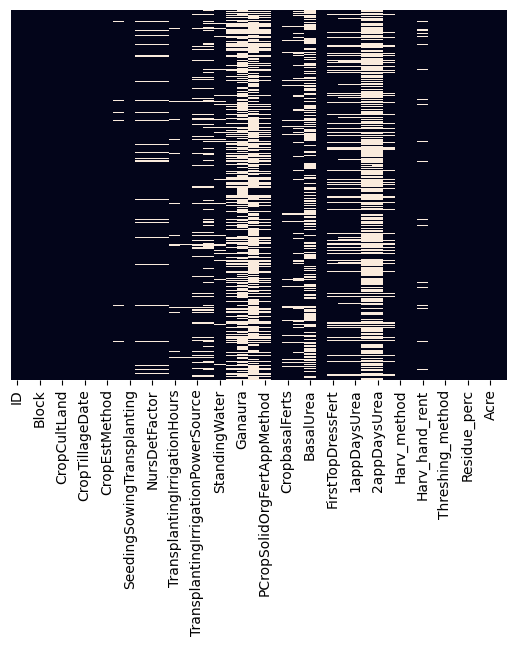

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


## Data  Pre-processing 

###  Function to drop columns which has large no. of missing data

In [8]:
def drop_columns(data, columns_to_drop):
    data = data.drop(columns=columns_to_drop, axis=1)
    return data

columns_to_drop = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting','Harv_date','Threshing_date','Ganaura','CropOrgFYM','2tdUrea','2appDaysUrea','BasalUrea']

train = drop_columns(train, columns_to_drop) 

<Axes: >

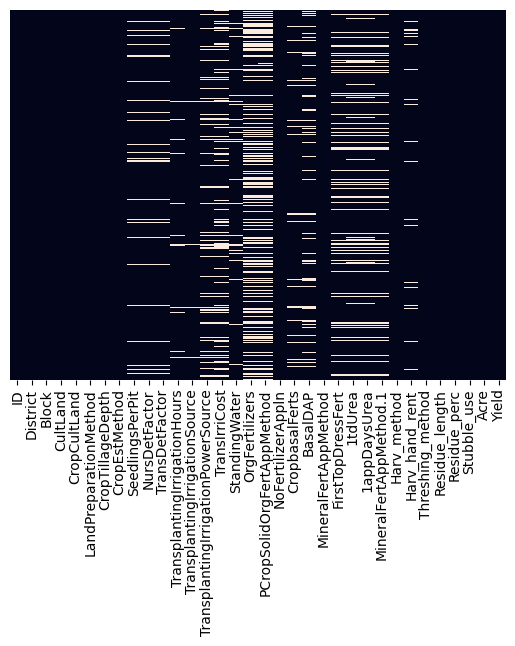

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


### Calaculate mode for Categorical coloumns and fill missing data

In [10]:
def fill_missing_with_mode(data, columns):
    for column in columns:
        mode_value = data[column].mode()[0]  
        data[column] = data[column].fillna(mode_value)  
    return data



In [11]:
columns_to_fill = [ 'NursDetFactor', 'TransDetFactor','TransplantingIrrigationSource','TransplantingIrrigationPowerSource','OrgFertilizers',
                   'PCropSolidOrgFertAppMethod','CropbasalFerts','1appDaysUrea','BasalDAP','FirstTopDressFert',
                   'MineralFertAppMethod.1','CropEstMethod']

train = fill_missing_with_mode(train, columns_to_fill)

<Axes: >

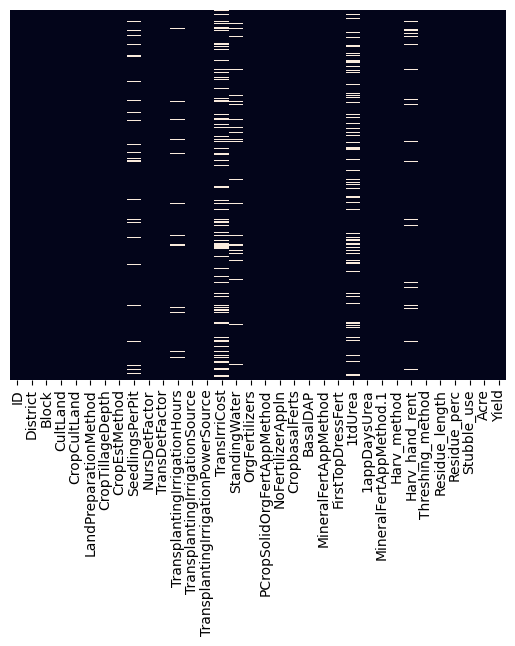

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


### Calaculate mean for Numerical coloumns and fill missing data

In [13]:
def fill_missing_with_mean(data, columns):
    for column in columns:
        mode_value = data[column].mean() 
        data[column] = data[column].fillna(mode_value)
    return data


In [14]:
coloumns=['SeedlingsPerPit','TransplantingIrrigationHours','TransIrriCost','StandingWater','Harv_hand_rent','BasalDAP',
          '1appDaysUrea','1tdUrea']

train = fill_missing_with_mean(train, coloumns)

In [15]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,5,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,200.000000,2.000000,Ganaura,SoilApplied,2,Urea,10.0,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,536.622443,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,5,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,125.000000,3.000000,Ganaura,SoilApplied,2,DAP Urea,15.0,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,3.000000,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.000000,Boring,Electric,80.000000,2.000000,Ganaura FYM,SoilApplied,2,DAP,4.0,SoilApplied,Urea,5.0,65.0,RootApplication,hand,480.000000,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.017677,Boring,Electric,379.726908,3.247522,Ganaura,SoilApplied,2,DAP Urea,6.0,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,240.000000,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,4,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.000000,Boring,Electric,300.000000,2.000000,Ganaura,SoilApplied,2,Urea DAP,15.0,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,536.622443,machine,24,40,plowed_in_soil,0.468750,550


<Axes: >

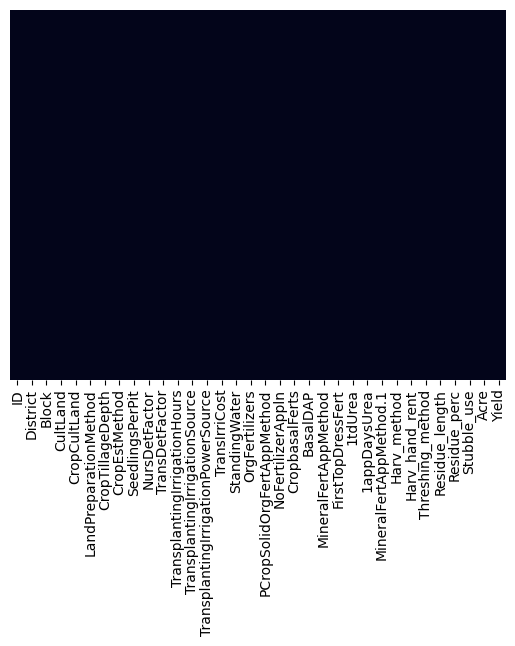

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


In [17]:
train.isnull().sum()

ID                                    0
District                              0
Block                                 0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0
CropTillageDepth                      0
CropEstMethod                         0
SeedlingsPerPit                       0
NursDetFactor                         0
TransDetFactor                        0
TransplantingIrrigationHours          0
TransplantingIrrigationSource         0
TransplantingIrrigationPowerSource    0
TransIrriCost                         0
StandingWater                         0
OrgFertilizers                        0
PCropSolidOrgFertAppMethod            0
NoFertilizerAppln                     0
CropbasalFerts                        0
BasalDAP                              0
MineralFertAppMethod                  0
FirstTopDressFert                     0
1tdUrea                               0
1appDaysUrea                          0


### Encode Categorical Variables

In [18]:

def label_encode_columns(df, columns_to_encode):
    
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        df[col] = label_encoder.fit_transform(df[col])
    return df 

In [19]:
columns_to_encode = [ 'NursDetFactor', 'TransDetFactor','TransplantingIrrigationSource','TransplantingIrrigationPowerSource','OrgFertilizers',
                   'PCropSolidOrgFertAppMethod','CropbasalFerts','1appDaysUrea','BasalDAP','FirstTopDressFert','MineralFertAppMethod.1',
                   'Stubble_use','Threshing_method',
                   'Harv_method','MineralFertAppMethod','CropEstMethod','LandPreparationMethod','Block','District','CropEstMethod']

train = label_encode_columns(train, columns_to_encode) 

In [20]:
train.head(10)

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,2,6,45,40,18,5,3,2.000000,10,47,5.000000,0,1,200.000000,2.000000,5,2,2,23,9,0,9,15.0,16,0,1,536.622443,1,30,40,1,0.312500,600
1,ID_TK40ARLSPOKS,2,7,26,26,41,5,3,2.000000,24,47,5.000000,0,1,125.000000,3.000000,5,2,2,9,14,0,9,20.0,37,0,0,3.000000,1,24,10,1,0.312500,600
2,ID_1FJY2CRIMLZZ,0,2,10,10,18,6,3,2.000000,95,133,4.000000,0,1,80.000000,2.000000,6,2,2,0,3,2,9,5.0,53,1,0,480.000000,1,30,10,1,0.148148,225
3,ID_I3IPXS4DB7NE,0,2,15,15,18,6,3,2.000000,24,47,8.017677,0,1,379.726908,3.247522,5,2,2,9,5,0,9,5.0,4,0,0,240.000000,0,26,10,1,0.222222,468
4,ID_4T8YQWXWHB4A,2,6,60,60,24,4,3,2.000000,10,150,9.000000,0,1,300.000000,2.000000,5,2,2,24,14,0,9,30.0,24,0,1,536.622443,1,24,40,1,0.468750,550
5,ID_W5MM9H353RL9,3,1,10,5,15,6,2,1.000000,35,46,1.000000,0,1,379.726908,3.000000,0,2,2,7,5,2,9,6.0,28,0,0,600.000000,0,30,10,1,0.136364,205
6,ID_6O44Z25H1JAV,1,4,12,12,15,3,3,4.000000,35,47,1.000000,1,1,379.726908,6.000000,5,2,3,0,2,0,9,4.0,26,0,0,130.000000,1,25,10,1,0.136364,270
7,ID_VRI9LEL2W3DR,2,7,80,80,6,4,0,2.706507,24,47,5.000000,0,1,379.726908,3.000000,5,2,2,9,14,0,9,15.0,33,0,1,536.622443,0,25,40,1,0.250000,490
8,ID_6YA9Y09O55LE,1,4,25,25,15,4,3,4.000000,35,47,2.000000,1,1,379.726908,5.000000,0,2,3,0,4,0,9,5.0,18,0,0,130.000000,1,26,10,1,0.227273,425
9,ID_EDA8RK1CP60K,2,6,20,10,29,5,3,3.000000,10,24,2.000000,0,1,100.000000,1.000000,5,2,2,23,9,0,9,5.0,18,0,0,80.000000,0,22,10,1,0.156250,300


### Scale Features


In [21]:

from sklearn.preprocessing import StandardScaler
def scale_columns(df, columns):
    scaler = StandardScaler()
    for col in columns:
        df[[col]] = scaler.fit_transform(df[[col]])  
    return df



numerical_columns =['SeedlingsPerPit','TransplantingIrrigationHours','TransIrriCost','StandingWater','Harv_hand_rent','BasalDAP',
                    '1appDaysUrea','1tdUrea','CultLand','CropCultLand','CropTillageDepth','NoFertilizerAppln',
                        'Residue_length',	'Residue_perc',	'Acre']
train = scale_columns(train, numerical_columns)





In [22]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,2,6,0.540950,0.545631,18,0.451610,3,-0.096344,10,47,-0.072661,0,1,-4.874009e-01,-0.583491,5,2,-0.290751,23,-0.155115,0,9,0.432292,-1.077928,0,1,0.000000,1,1.090748,3.996709,1,0.095092,600
1,ID_TK40ARLSPOKS,2,7,-0.083018,0.045474,41,0.451610,3,-0.096344,24,47,-0.072661,0,1,-6.907932e-01,-0.115771,5,2,-0.290751,9,0.576416,0,9,1.052310,1.070631,0,0,-0.484773,1,-0.788680,-0.250206,1,0.095092,600
2,ID_1FJY2CRIMLZZ,0,2,-0.608464,-0.526135,18,1.334303,3,-0.096344,95,133,-0.096740,0,1,-8.128286e-01,-0.583491,6,2,-0.290751,0,-1.032951,2,9,-0.807745,2.707629,1,0,-0.051439,1,1.090748,-0.250206,1,-0.699295,225
3,ID_I3IPXS4DB7NE,0,2,-0.444262,-0.347507,18,1.334303,3,-0.096344,24,47,0.000000,0,1,1.541535e-16,0.000000,5,2,-0.290751,9,-0.740339,0,9,-0.807745,-2.305676,0,0,-0.269469,0,-0.162204,-0.250206,1,-0.341261,468
4,ID_4T8YQWXWHB4A,2,6,1.033557,1.260142,24,-0.431082,3,-0.096344,10,150,0.023653,0,1,-2.162112e-01,-0.583491,5,2,-0.290751,24,0.576416,0,9,2.292348,-0.259429,0,1,0.000000,1,-0.788680,3.996709,1,0.850320,550


### Split the dataset into training and test sets


In [23]:
X = train.drop(['ID','Yield'], axis = 1)
X =X.select_dtypes(include=np.number)
y = train.Yield
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1235)



## Initialize and fit Random Forest Regressor model
### Calculate RMSE


In [24]:
model = RandomForestRegressor(n_estimators=10,random_state = 1235)
model.fit(X_train, y_train)
prediction_for_X_train = model.predict(X_test)
error =np.sqrt(mean_squared_error(y_test, prediction_for_X_train))
print(error)


272.1921950688911


### prediction for Train data set

In [25]:

prediction = model.predict(X)
results = pd.DataFrame({'ID': train.ID, 'Yield': prediction})
print(results)



                   ID  Yield
0     ID_GTFAC7PEVWQ9  588.0
1     ID_TK40ARLSPOKS  600.0
2     ID_1FJY2CRIMLZZ  261.7
3     ID_I3IPXS4DB7NE  413.3
4     ID_4T8YQWXWHB4A  610.0
...               ...    ...
3865  ID_7ZZQ6R4XB4FK  724.0
3866  ID_PVVDF6LK6FO8  305.0
3867  ID_RBYVUPRATVMW  682.0
3868  ID_ARE9QWENJNJ2  440.0
3869  ID_KEPOQDTCZC6S  278.3

[3870 rows x 2 columns]


## Appling pre-processing on Test data set

In [26]:
test = drop_columns(test, columns_to_drop) 
test = fill_missing_with_mode(test, columns_to_fill)
test = fill_missing_with_mean(test, coloumns)
test = label_encode_columns(test, columns_to_encode)
test = scale_columns(test, numerical_columns)



### Make predictions on test data set and create submission file


In [27]:
test_df = test[X.columns]
preds = model.predict(test_df)

sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
sub.to_csv('Final_Submission.csv', index = False)

sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,1077.4
1,ID_SO3VW2X4QO93,412.0
2,ID_UKUQ7JM8E894,1015.0
3,ID_QUISMWEZR2H4,264.8
4,ID_25JGI455VKCZ,1135.2
